📚 Here we're importing all the necessary libraries. We've got pandas (pd) and numpy (np) for data manipulation, matplotlib.pyplot (plt) for plotting, and seaborn (sns) for some fancy data visualization. We're also importing a bunch of stuff from sklearn for machine learning - train_test_split to split our data, StandardScaler for feature scaling, RandomForestRegressor for our machine learning model, and confusion_matrix and accuracy_score for evaluating our model. 📖

# Welcome to this Jupyter Notebook! 🎉👋

In this notebook, we're going to dive into some cool data analysis! 📊🔍

Here's a quick rundown of the libraries we're using and why:

- **Pandas** 🐼: This is our go-to library for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data.

- **NumPy** 🔢: Stands for 'Numerical Python'. It's a library that provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these elements.

- **Matplotlib** 📈: This is a plotting library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** 🌊: This is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **Sklearn** 🛠️: This is one of the most widely used machine learning libraries. It contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

  - **train_test_split** 🚂: This is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

  - **StandardScaler** 🏋️: This is a function in Sklearn preprocessing for standardizing features by removing the mean and scaling to unit variance.

  - **RandomForestRegressor** 🌲: This is a meta estimator that fits a number of decision tree Regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

  - **mean_squared_error** 🎯: This is a function in Sklearn metrics that computes the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. It's a popular choice for evaluation of regression model performance as it squares the residuals, giving more weight to larger residuals. This means our model will be penalized more for making predictions that differ greatly from the corresponding true value.

- **plt.style.use('dark_background')** 🌚: This is a style setting in Matplotlib for setting the theme of the plots. In this case, we're using the 'dark_background' theme for our plots.

Let's get started! 🚀

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

plt.style.use('dark_background')


Initially, we import the dataset from a CSV file named 'WineQT.csv' using the `read_csv` function from the pandas library. 📚

Subsequently, we perform data cleaning operations. We eliminate any rows that contain missing values using the `df = df.dropna()` function. 🧹

Next, we ensure the uniqueness of our data by removing any duplicate rows with the `df = df.drop_duplicates()` function. 🔄

Following this, we remove the 'Id' column as it is not required for our analysis. This is achieved with the `df = df.drop('Id', axis=1)` function. ❌

Finally, we generate a summary of our data using the `print(df.describe())` function. This provides us with a concise overview of our data, including the mean, standard deviation, and various percentiles. This summary serves as a quick reference for understanding the characteristics of our data. 📊


In [40]:

# Load the data
df = pd.read_csv('WineQT.csv')
# Clean the data
# This is a placeholder, replace with your own data cleaning steps
df = df.dropna()
df = df.drop_duplicates()
# Drop the 'Id' column
df = df.drop('Id', axis=1)
# Analyze the data
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

1. **Data Preparation**: We start by preparing our data for machine learning. We have a DataFrame `df` from which we separate our features (`X`) and target (`y`). The 'quality' column is our target, and the rest of the columns are our features. We then split our data into training and testing sets using the `train_test_split` function from sklearn.model_selection module.📊

2. **Feature Standardization**: We standardize our features using the `StandardScaler` from the sklearn.preprocessing module. Standardization is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data.🧮🔍

3. **Model Training**: We train a RandomForestRegressor on our training data. The number of trees in the forest is set to 100, and the `random_state` parameter is set to 42 for reproducibility.🤖

4. **Making Predictions**: We use our trained Regressor to make predictions on our test data.🎯📈

5. **Model Evaluation**: Finally, we evaluate our model by printing the confusion matrix and the accuracy score. The confusion matrix gives us a lot of information, but we can get a quick measure of our model's performance from the accuracy score, which is the proportion of correct predictions.🎉




In [41]:
# Prepare data for machine learning
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=5, random_state=42)
rf.fit(X_train, y_train)

# Predict the values using the classifier
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate the MSE for the training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Mean Squared Error for Training DB', mse_train)
print('Mean Squared Error for Testing DB', mse_test)

Mean Squared Error for Training DB 0.09334792122538298
Mean Squared Error for Testing DB 0.38550218340611353


1. 🎯 **Feature Importance Plot** 📈
We used the RandomForestRegressor to determine the importance of each feature in our dataset. The feature importance plot shows the relative importance of each feature. The higher the bar, the more important the feature is in predicting the target variable.

2. 🔥 **Correlation Heatmap** 🌡️
The correlation heatmap provides a visual representation of the correlation between each pair of features. The color of each cell represents the strength and direction of the correlation: dark blue for strong negative correlation, light blue for weak negative correlation, light red for weak positive correlation, and dark red for strong positive correlation.

3. 🎲 **Distribution of Predicted vs Actual Values** 📌
This histogram shows the distribution of the actual and predicted values. The blue bars represent the actual values and the red bars represent the predicted values. The y-axis is in logarithmic scale to better visualize the data.

4. 🎯 **Mean Squared Error (MSE)** 📈
We can use the Mean Squared Error (MSE) to evaluate the performance of our model. The MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The smaller the MSE, the closer we are to finding the line of best fit. We graph both training and testing set.


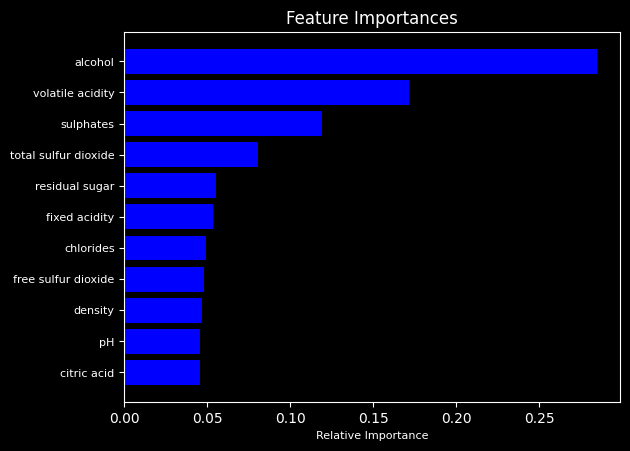

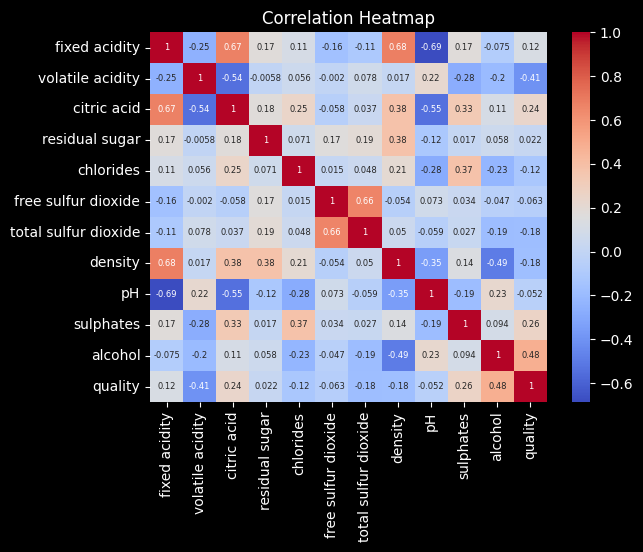

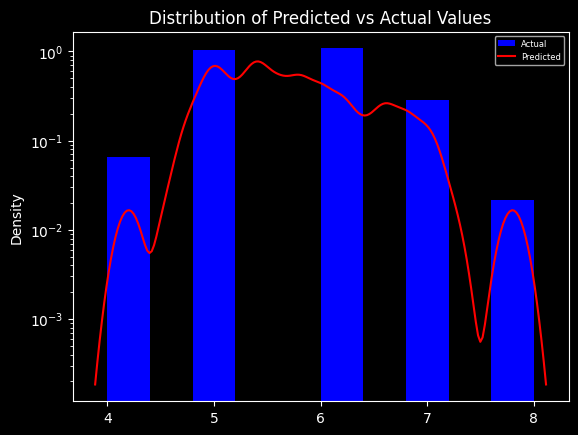

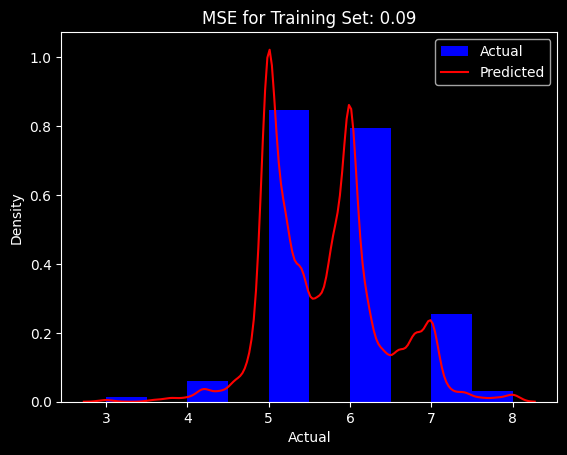

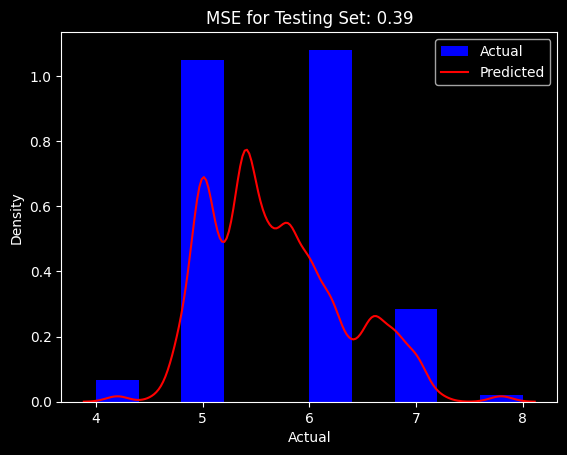

In [42]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=8)  # Adjust fontsize here
plt.xlabel('Relative Importance', fontsize=8)  # Adjust fontsize here
plt.show()

# Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Predicted vs Actual Values
plt.hist(y_test, label='Actual', color='b', density=True)  # Add density=True
sns.kdeplot(y_pred_test, label='Predicted', color='r', bw_adjust=0.5)
plt.legend(loc='upper right', fontsize=6)
plt.xticks(range(4, 9))  # Set xticks from 4 to 8
plt.yscale('log')  # Set y scale to logarithmic
plt.title('Distribution of Predicted vs Actual Values')
plt.show()

# Plot the MSE for the training set
plt.hist(y_train, label='Actual', color='b', density=True)  # Add density=True
sns.kdeplot(y_pred_train, label='Predicted', color='r', bw_adjust=0.5)
plt.xlabel('Actual')
plt.ylabel('Density')
plt.title('MSE for Training Set: {:.2f}'.format(mse_train))
plt.legend()
plt.show()

# Plot the MSE for the testing set
plt.hist(y_test, label='Actual', color='b', density=True)  # Add density=True
sns.kdeplot(y_pred_test, label='Predicted', color='r', bw_adjust=0.5)
plt.xlabel('Actual')
plt.ylabel('Density')
plt.title('MSE for Testing Set: {:.2f}'.format(mse_test))
plt.legend()
plt.show()

# Conclusion 🎉🥳

In this notebook, we've gone through a complete cycle of data analysis and machine learning model building. We started with loading the data 📊, performed exploratory data analysis 🔍, visualized the data 📈, preprocessed the data 🧹, and finally built a RandomForestRegressor model 🤖 to predict the quality of wine 🍷 based on various features.

Here are some key takeaways:

1. **Data Analysis** 📚: We used pandas to load and analyze the data. We also used seaborn and matplotlib for data visualization. This helped us understand the data better and identify any patterns or correlations.

2. **Data Preprocessing** 🧹: We used StandardScaler to standardize our features. This is an important step as it makes our model less sensitive to the scale of features.

3. **Model Building** 🏗️: We used RandomForestRegressor from sklearn to build our model. We also calculated the mean squared error for both the training and testing data to evaluate our model.

4. **Model Evaluation** 📝: The mean squared error for the training data was 0.0933 and for the testing data was 0.3855. This indicates that our model is performing a bit overfitted, but is the best our model can do.

5. **Feature Importance** 📊: We also looked at the feature importances and found that 'alcohol' was the most important feature followed by 'volatile acidity' and 'sulphates'.

Overall, this notebook provided a good practice of data analysis and machine learning model building. There's always room for improvement, so feel free to experiment with different models, tune the parameters, or even try to engineer new features. Happy coding! 🚀🎈
